Based on plot_temp_u by Fanghua Wu

In [18]:
%matplotlib inline
import cosima_cookbook as cc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, shiftgrid
import numpy as np
import netCDF4 as nc
import xarray as xr
import os

In [19]:
from joblib import Memory

memory = Memory(cachedir='/g/data1/v45/cosima-cookbook/', verbose=0)

In [20]:
figdir = '/g/data/v45/aek156/figures/access-om2-01/plot_temp_u_eq_ACCESS-OM2-01/'
if not os.path.exists(figdir):
    os.makedirs (figdir)

def savefigure(fname):
    plt.savefig(os.path.join(figdir, fname),dpi=200, bbox_inches="tight")  # comment out to disable saving
    return

In [21]:
ncfile = 'ocean.nc'
#expt = 'mom025_jra_ryf9091'
# expt = 'KDS75_newbathy_JRA' 
expt = '01deg_jra55v13_ryf8485_spinup6'

In [31]:
temp = cc.get_nc_variable(expt, ncfile, 'temp',
                        chunks={'st_ocean': None}, # n=12,
                        time_units="days since 1900-01-01")

u = cc.get_nc_variable(expt, ncfile, 'u',
                        chunks={'st_ocean': None}, # n=12,
                        time_units="days since 1900-01-01")

HBox(children=(IntProgress(value=0, description='get_nc_variable:', max=132), HTML(value='')))

HBox(children=(IntProgress(value=0, description='get_nc_variable:', max=132), HTML(value='')))

In [35]:
# Definition the Pacific region: Depth 0-300 meters, Latitude along the Equator, Longitude 143E-265E
upper_temp_eq = temp.sel(time=slice('1904-01','1913-12')).sel(st_ocean=slice(0,300)).sel(yt_ocean=0., method='nearest').sel(xt_ocean=slice(-217,-95))
# upper_temp_eq = temp.sel(st_ocean=slice(0,300)).sel(yt_ocean=0., method='nearest').sel(xt_ocean=slice(-217,-95))
upper_temp_eq += -273.15  # convert from K to C
mean_upper_temp_eq = upper_temp_eq.mean('time')

In [33]:
# Definition the Pacific region: Depth 0-300 meters, Latitude along the Equator, Longitude 143E-265E
upper_u_eq = u.sel(time=slice('1904-01','1913-12')).sel(st_ocean=slice(0,300)).sel(yu_ocean=0., method='nearest').sel(xu_ocean=slice(-217,-95))
# upper_u_eq = u.sel(st_ocean=slice(0,300)).sel(yu_ocean=0., method='nearest').sel(xu_ocean=slice(-217,-95))
mean_upper_u_eq = upper_u_eq.mean('time')

In [25]:
dep = upper_u_eq.st_ocean
lon_eq = upper_temp_eq.xt_ocean
lon_u_eq = upper_u_eq.xu_ocean

In [26]:
obs_file = xr.open_dataset('/g/data1/v45/fw4078/obs-data/meanfit_m.cdf')
obs_temp = obs_file['POTEMPM']
obs_temp_eq = obs_temp.sel(ZDEP1_50=slice(0,300)).sel(YLAT11_101=0., method='nearest')
lon_obs = obs_temp_eq.XLON
dep_obs = obs_temp_eq.ZDEP1_50

In [27]:
obs_u = obs_file['UM']
obs_u_eq = obs_u.sel(ZDEP1_50=slice(0,300)).sel(YLAT11_101=0., method='nearest')
lon_u_obs = obs_u_eq.XLON

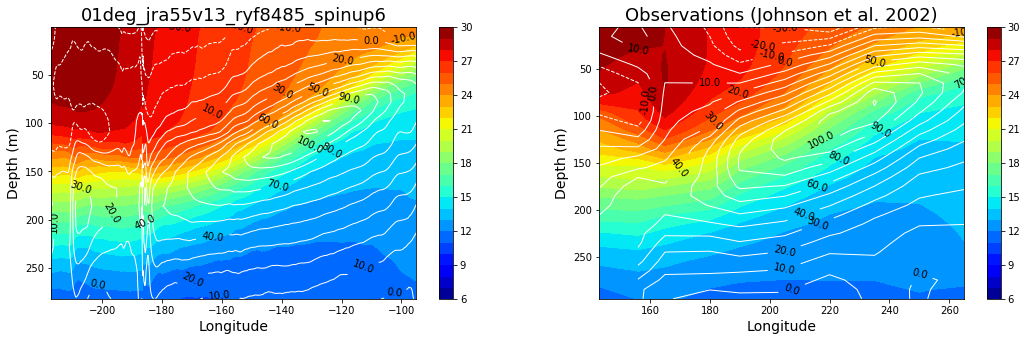

In [37]:
tlevels = np.arange(6,31,1)
ulevels = np.arange(-120,121,10)

fig_eqobs = plt.figure( figsize=(18,5) )

ax = fig_eqobs.add_subplot(121)
#ax.set_axis_bgcolor('gray')
ax1 = ax.contourf(lon_eq, dep, mean_upper_temp_eq, cmap=plt.cm.jet, levels=tlevels)
cbar = plt.colorbar(ax1)
ax2 = ax.contour(lon_u_eq, dep, mean_upper_u_eq*100, colors = 'w', linewidths=1, levels=ulevels)
plt.clabel(ax2, fmt='%2.1f', colors='black', fontsize=10)
plt.gca().invert_yaxis()
#cax = ax.contourf(lon_u_eq, dep, mean_upper_u_eq, 8, colors='black')
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Depth (m)', fontsize=14 )
ax.set_title(expt, fontsize=18)

ax = fig_eqobs.add_subplot(122)
#ax.set_axis_bgcolor('gray')
ax1 = ax.contourf(lon_obs, dep_obs, obs_temp_eq, cmap=plt.cm.jet, levels=tlevels)
cbar = plt.colorbar(ax1)
ax2 = ax.contour(lon_u_obs, dep_obs, obs_u_eq*100, colors = 'w', linewidths=1, levels=ulevels)
plt.clabel(ax2, fmt='%2.1f', colors='black', fontsize=10)
plt.gca().invert_yaxis()
#cax = ax.contourf(lon_u_eq, dep, mean_upper_u_eq, 8, colors='black')
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Depth (m)', fontsize=14 )
ax.set_title('Observations (Johnson et al. 2002)', fontsize=18)

savefigure('temp_u_eq.png')
#fig_eqobs.suptitle('SST along the Pacific equator ($^\circ$C)', fontsize=22)
#plt.savefig('seasonal_cycle.png')